<a href="https://colab.research.google.com/github/bongho/codewar/blob/master/200118_CNN_Examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.models import *
from keras.layers import *

import numpy as np
import matplotlib.pyplot as plt

In [41]:
model = Sequential()
model.add( Conv2D(16,(3,3), strides = 1, padding = 'same' ,input_shape=(32,32,3)))  #채널의 갯수=16
model.add( Dropout(0.3))
model.add(ReLU())
model.add( Conv2D(16,(3,3), strides=1, padding='same'))
model.add(ReLU())
model.add(MaxPool2D())

model.add( Conv2D(32,(3,3), strides=1, padding='same'))
model.add( Dropout(0.3))
model.add(ReLU())
model.add( Conv2D(32,(3,3), strides=1, padding='same'))
model.add(ReLU())
model.add(MaxPool2D())

model.add(Flatten())

model.add(Dense(1024))
model.add(ReLU())
model.add(Dense(1024))
model.add(ReLU())

model.add(Dense(10))
model.add( Softmax())


model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 16)        0         
_________________________________________________________________
re_lu_63 (ReLU)              (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 32, 32, 16)        2320      
_________________________________________________________________
re_lu_64 (ReLU)              (None, 32, 32, 16)        0         
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 16, 16, 32)      

In [38]:
from keras.datasets import cifar10
from keras.utils import to_categorical 
(x_train,y_train),(x_test, y_test) = cifar10.load_data()
x_train = x_train / 255.0
y_train = to_categorical(y_train)
x_train.shape,y_train.shape

((50000, 32, 32, 3), (50000, 10))

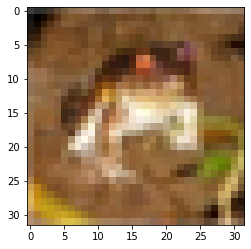

In [39]:
plt.imshow(x_train[0])

In [40]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])
history = model.fit(x_train,y_train,batch_size = 128, epochs= 20, validation_split = 0.1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
45000/45000 [==============================] - 7s 147us/step - loss: 1.4926 - acc: 0.4537 - val_loss: 1.1917 - val_acc: 0.5764
Epoch 2/20
45000/45000 [==============================] - 5s 114us/step - loss: 1.0433 - acc: 0.6286 - val_loss: 0.9822 - val_acc: 0.6500
Epoch 3/20
45000/45000 [==============================] - 5s 113us/step - loss: 0.8455 - acc: 0.7026 - val_loss: 0.9204 - val_acc: 0.6692
Epoch 4/20
45000/45000 [==============================] - 5s 113us/step - loss: 0.6921 - acc: 0.7560 - val_loss: 0.7915 - val_acc: 0.7262
Epoch 5/20
45000/45000 [==============================] - 5s 114us/step - loss: 0.5368 - acc: 0.8119 - val_loss: 0.8106 - val_acc: 0.7300
Epoch 6/20
45000/45000 [==============================] - 5s 115us/step - loss: 0.3794 - acc: 0.8668 - val_loss: 0.9003 - val_acc: 0.7208
Epoch 7/20
45000/45000 [==============================] - 5s 112us/step - loss: 0.2541 - acc: 0.9116 - val_loss: 1.0589 - v

In [42]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])
history2 = model.fit(x_train,y_train,batch_size = 128, epochs= 20, validation_split = 0.1) #너무 과적합되어서 모델에서 drop_out을 설정

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
45000/45000 [==============================] - 7s 163us/step - loss: 1.7088 - acc: 0.3707 - val_loss: 1.4887 - val_acc: 0.4660
Epoch 2/20
45000/45000 [==============================] - 5s 122us/step - loss: 1.3024 - acc: 0.5315 - val_loss: 1.2533 - val_acc: 0.5444
Epoch 3/20
45000/45000 [==============================] - 5s 120us/step - loss: 1.1264 - acc: 0.5966 - val_loss: 1.1030 - val_acc: 0.6060
Epoch 4/20
45000/45000 [==============================] - 5s 119us/step - loss: 0.9860 - acc: 0.6472 - val_loss: 1.0775 - val_acc: 0.6164
Epoch 5/20
45000/45000 [==============================] - 5s 117us/step - loss: 0.8650 - acc: 0.6918 - val_loss: 0.9440 - val_acc: 0.6728
Epoch 6/20
45000/45000 [==============================] - 5s 117us/step - loss: 0.7474 - acc: 0.7329 - val_loss: 0.8835 - val_acc: 0.6994
Epoch 7/20
45000/45000 [==============================] - 5s 116us/step - loss: 0.6351 - acc: 0.7751 - val_loss: 0.8945 - v

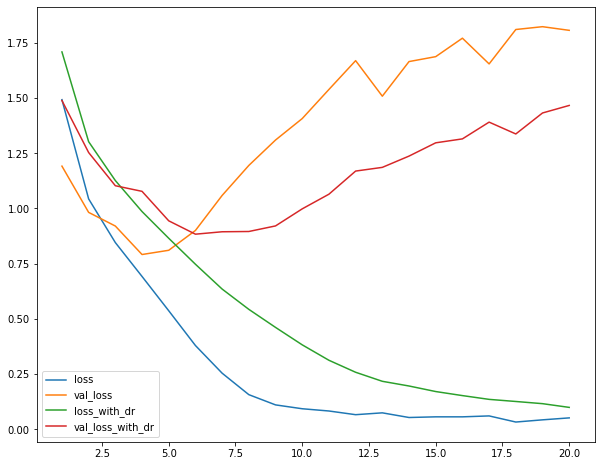

In [43]:
result1 = history.history
result2 = history2.history

epochs = range(1,21)

plt.figure(figsize=(10,8),facecolor='white')
plt.plot(epochs, result1['loss'])
plt.plot(epochs, result1['val_loss'])
plt.plot(epochs, result2['loss'])
plt.plot(epochs, result2['val_loss'])
plt.legend(['loss','val_loss','loss_with_dr','val_loss_with_dr'])

In [51]:
model3 = Sequential()

model3.add( Conv2D(16,(3,3), strides = 1, padding = 'same' ,input_shape=(32,32,3)))  #채널의 갯수=16
model3.add( Dropout(0.3))
model3.add(ReLU())
model3.add( Conv2D(16,(3,3), strides = 1, padding = 'same' ,input_shape=(32,32,3)))  #채널의 갯수=16
model3.add( Dropout(0.3))
model3.add(ReLU())
model3.add(MaxPool2D())


model3.add( Conv2D(32,(3,3), strides = 1, padding = 'same' ,input_shape=(32,32,3)))  #채널의 갯수=16
model3.add( Dropout(0.3))
model3.add(ReLU())
model3.add( Conv2D(32,(3,3), strides = 1, padding = 'same' ,input_shape=(32,32,3)))  #채널의 갯수=16
model3.add( Dropout(0.3))
model3.add(ReLU())
model3.add(MaxPool2D())


model3.add( Conv2D(64,(3,3), strides = 1, padding = 'same' ,input_shape=(32,32,3)))  #채널의 갯수=16
model3.add( Dropout(0.3))
model3.add(ReLU())
model3.add( Conv2D(64,(3,3), strides = 1, padding = 'same' ,input_shape=(32,32,3)))  #채널의 갯수=16
model3.add( Dropout(0.3))
model3.add(ReLU())
model3.add(MaxPool2D())

model3.add(GlobalAveragePooling2D())

model3.add(Dense(10))
model3.add( Softmax())


model3.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_80 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
dropout_19 (Dropout)         (None, 32, 32, 16)        0         
_________________________________________________________________
re_lu_90 (ReLU)              (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 32, 32, 16)        2320      
_________________________________________________________________
dropout_20 (Dropout)         (None, 32, 32, 16)        0         
_________________________________________________________________
re_lu_91 (ReLU)              (None, 32, 32, 16)        0         
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 16, 16, 16)      

In [52]:
model3.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])
history3 = model3.fit(x_train,y_train,batch_size = 128, epochs= 20, validation_split = 0.1) #너무 과적합되어서 모델에서 drop_out을 설정

Train on 45000 samples, validate on 5000 samples
Epoch 1/20
45000/45000 [==============================] - 7s 159us/step - loss: 1.9035 - acc: 0.2854 - val_loss: 1.9223 - val_acc: 0.3284
Epoch 2/20
45000/45000 [==============================] - 5s 113us/step - loss: 1.5753 - acc: 0.4182 - val_loss: 1.6799 - val_acc: 0.4186
Epoch 3/20
45000/45000 [==============================] - 5s 112us/step - loss: 1.4235 - acc: 0.4798 - val_loss: 1.5470 - val_acc: 0.4652
Epoch 4/20
45000/45000 [==============================] - 5s 114us/step - loss: 1.3355 - acc: 0.5157 - val_loss: 1.4887 - val_acc: 0.4852
Epoch 5/20
45000/45000 [==============================] - 5s 115us/step - loss: 1.2650 - acc: 0.5421 - val_loss: 1.4254 - val_acc: 0.5230
Epoch 6/20
45000/45000 [==============================] - 5s 115us/step - loss: 1.2131 - acc: 0.5614 - val_loss: 1.3425 - val_acc: 0.5648
Epoch 7/20
45000/45000 [==============================] - 5s 113us/step - loss: 1.1666 - acc: 0.5834 - val_loss: 1.2902 - v

In [0]:
result1 = history.history
result2 = history2.history
result3 = history3.history

epochs = range(1,21)

plt.figure(figsize=(10,8),facecolor='white')
plt.plot(epochs, result1['loss'])
plt.plot(epochs, result1['val_loss'])
plt.plot(epochs, result2['loss'])
plt.plot(epochs, result2['val_loss'])
plt.legend(['loss','val_loss','loss_with_dr','val_loss_with_dr'])